In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [5]:

df = pd.read_csv('breast-cancer.csv')


if 'id' in df.columns:
    df = df.drop('id', axis=1)


le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully loaded and preprocessed.")

Data successfully loaded and preprocessed.


In [6]:

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print(f"Accuracy with Linear Kernel: {accuracy_score(y_test, y_pred_linear):.4f}")


svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"Accuracy with RBF Kernel: {accuracy_score(y_test, y_pred_rbf):.4f}")

Accuracy with Linear Kernel: 0.9649
Accuracy with RBF Kernel: 0.9591


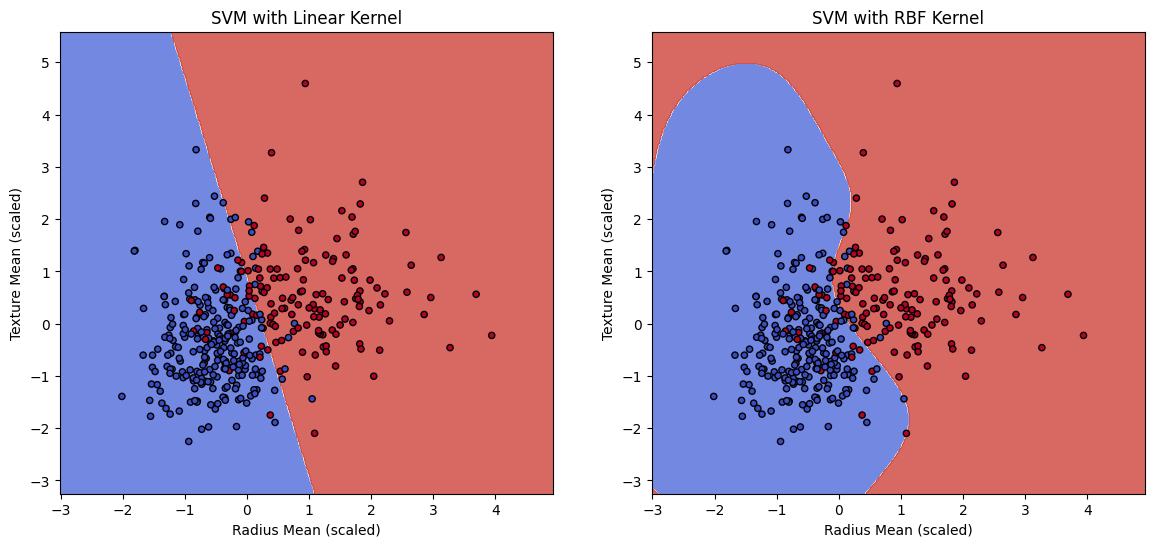

In [8]:

X_vis = X_train_scaled[:, :2]
y_vis = y_train


h = .02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


    SVC(kernel='linear', random_state=42).fit(X_vis, y_vis),
    SVC(kernel='rbf', random_state=42).fit(X_vis, y_vis)
)
titles = ('SVM with Linear Kernel', 'SVM with RBF Kernel')

plt.figure(figsize=(14, 6))
for i, (clf, title) in enumerate(zip(models_to_plot, titles)):
    plt.subplot(1, 2, i + 1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Radius Mean (scaled)')
    plt.ylabel('Texture Mean (scaled)')
    plt.title(title)

plt.show()

In [9]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}


grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

grid.fit(X_train_scaled, y_train)


print("\n--- Hyperparameter Tuning Results ---")
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [10]:

best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print("\n--- Final Evaluation on Test Set ---")
print("Test Set Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_best)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


--- Final Evaluation on Test Set ---
Test Set Accuracy: 0.9532

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       107
           1       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171

